In [49]:
import numpy as np
from astropy.stats import LombScargle
import csv
import scipy.io as sio
import matplotlib.pyplot as plt  

mat_contents = sio.loadmat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/data_acti_4days.mat')

t = mat_contents['tt_4']
y = mat_contents['yy_4']

t = t.flatten()
y = y.flatten()
dy = 0.001

ls = LombScargle(t, y, dy)
freq, power = ls.autopower(samples_per_peak = 100)


In [50]:
import numpy as np
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/freq.mat', {'freq':freq})
sio.savemat('/home/aldo/Documents/Projects/Avtivemeter/Data/code_cruze_paper/Re actimetry/power.mat', {'power':power})

In [51]:
t_freq = 1/freq
times = t_freq[np.logical_and(t_freq>=1140, t_freq<=1680)]
#print(times)
powers = power[np.logical_and(t_freq>=1140, t_freq<=1680)]
#print(powers)

In [52]:
from scipy.signal import find_peaks
yyy = find_peaks(powers)
print(yyy[0])
print(powers[yyy[0]])
print(times[yyy[0]])   

[65]
[ 0.02294954]
[ 1409.79192166]


In [53]:
power_circ = powers[yyy[0]]
ls.false_alarm_probability(power_circ, method='naive')  

array([  1.36281565e-25])

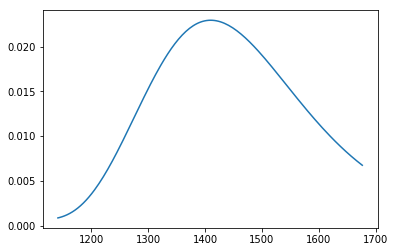

In [54]:
plt.plot(times,powers)
plt.show()